In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from langdetect import detect
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score

## Data Processing
**Importing Datasets**

In [2]:
#importing the datasets
data1_fake = pd.read_csv('./Data_RealFake/Dataset1/Fake1.csv')
data1_true = pd.read_csv('./Data_RealFake/Dataset1/True1.csv')

dtset1_fake = pd.DataFrame(data1_fake)
dtset1_true = pd.DataFrame(data1_true)

Changing the labels: fake = 0 and real = 1

In [3]:
dtset1_fake['label']=0
dtset1_true['label']=1

pd.DataFrame.head(dtset1_fake)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
pd.DataFrame.head(dtset1_true)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
print(dtset1_fake.shape)
print(dtset1_true.shape)

(23481, 5)
(21417, 5)


Concatinating Datasets

In [6]:
dataset1 = pd.concat([dtset1_fake, dtset1_true])
pd.DataFrame.head(dataset1)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
dataset1.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

Combining Title and Text

In [8]:
dataset1['content'] = dataset1['title']+" "+dataset1['text']

In [9]:
pd.DataFrame.head(dataset1)

,title,text,subject,date,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...


Dataset content

In [10]:
dataset1.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

## Dataset Feature Extraction and Selection

In [11]:
content = dataset1.content
print(content)

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
21412    'Fully committed' NATO backs new U.S. approach...
21413    LexisNexis withdrew two products from Chinese ...
21414    Minsk cultural hub becomes haven from authorit...
21415    Vatican upbeat on possibility of Pope Francis ...
21416    Indonesia to buy $1.14 billion worth of Russia...
Name: content, Length: 44898, dtype: object


**Porter Stemmer**

In [12]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed = re.sub('[^a-zA-Z]',' ', content)
    stemmed = stemmed.lower()
    stemmed = stemmed.split()
    stemmed = [port_stem.stem(word) for word in stemmed if not word in stopwords.words('english')]
    stemmed = ' '.join(stemmed)
    return stemmed

In [13]:
dataset1['content'] = dataset1['content'].apply(stemming)
pd.DataFrame.head(dataset1)

,title,text,subject,date,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump send embarrass new year eve messa...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,drunk brag trump staffer start russian collus ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,sheriff david clark becom internet joke threat...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,trump obsess even obama name code websit imag ...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope franci call donald trump christma speech ...


In [74]:
X = dataset1['content'].values

**Tf-Idf Vectorizer**

In [75]:
#TfIdf Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

print(X)

  (0, 87936)	0.2795306907460013
  (0, 87859)	0.08562423549376791
  (0, 86789)	0.031341434847236116
  (0, 86633)	0.0269911018870253
  (0, 86551)	0.018630891421478037
  (0, 86537)	0.026954605340847374
  (0, 86453)	0.03425388797749684
  (0, 86130)	0.18418714773788453
  (0, 85256)	0.026378114510500865
  (0, 85245)	0.08889530050540474
  (0, 85234)	0.06032882728522855
  (0, 85206)	0.08889530050540474
  (0, 84561)	0.03671607216929524
  (0, 83998)	0.021128027282801734
  (0, 82341)	0.037207302248057295
  (0, 80280)	0.022652949623220658
  (0, 80220)	0.10875823643026143
  (0, 79543)	0.13560960580162396
  (0, 77546)	0.020341410661505722
  (0, 77171)	0.08889530050540474
  (0, 77117)	0.05593193599612378
  (0, 76851)	0.026255603725787745
  (0, 76607)	0.04449778828360175
  (0, 75964)	0.021893309303084706
  (0, 75942)	0.08562423549376791
  :	:
  (44897, 16771)	0.04487565091348077
  (44897, 16715)	0.04041272617477231
  (44897, 15830)	0.055771783493825146
  (44897, 15765)	0.0274310329852247
  (44897, 154

**CountVectorizer**

In [76]:
#CountVectorizer
#vectorizer = CountVectorizer()
#vectorizer.fit(X)
#X = vectorizer.transform(X)

#print(X)

**Train Test Split**

In [77]:
y = dataset1['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=80)

print(X_train.shape)
print(X_test.shape)


(35918, 89868)
(8980, 89868)


In [78]:
print(X_train)

  (0, 86633)	0.023301391527959445
  (0, 86624)	0.062395091245178
  (0, 86153)	0.062106237490629275
  (0, 85056)	0.1478386354046234
  (0, 84745)	0.11400635114479189
  (0, 83678)	0.08080864093710434
  (0, 83424)	0.06640595753976591
  (0, 83274)	0.1478386354046234
  (0, 83264)	0.5000499415887609
  (0, 82890)	0.2315308231063145
  (0, 80280)	0.039112537949963624
  (0, 79543)	0.1639002937392782
  (0, 78624)	0.1229995476099941
  (0, 78392)	0.08995348444743823
  (0, 77960)	0.027293590389549455
  (0, 77696)	0.09253554945723588
  (0, 74473)	0.18763882490092207
  (0, 73874)	0.09164059107949393
  (0, 71119)	0.2239959401585885
  (0, 70799)	0.033551384185418205
  (0, 69747)	0.04687920375772057
  (0, 69280)	0.06541802143608458
  (0, 69264)	0.05679432375657027
  (0, 64139)	0.04644977750575139
  (0, 62743)	0.15153028482537176
  :	:
  (35917, 22422)	0.04647332340582361
  (35917, 17066)	0.03342005318174431
  (35917, 16217)	0.06609089128236054
  (35917, 16149)	0.0826350119195129
  (35917, 16146)	0.1155768

In [79]:
X_test

<8980x89868 sparse matrix of type '<class 'numpy.float64'>'
	with 1380208 stored elements in Compressed Sparse Row format>

In [80]:
y_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [81]:
y_test

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

## Model Training

**Logistic Regression**

In [82]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LRpred = LR.predict(X_test)

In [83]:
print(LRpred)
print(y_test)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


[[4643   60]
 [  62 4215]]


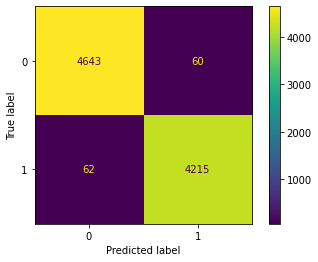

In [84]:
from sklearn import metrics
LR_r_score = metrics.confusion_matrix(y_test, LRpred)
print(LR_r_score)
disp = ConfusionMatrixDisplay(LR_r_score)
disp.plot()

In [85]:
LR_r_score = np.flip(LR_r_score)

#accuracy
LR_acc = (LR_r_score[0][0] + LR_r_score[-1][-1]) / np.sum(LR_r_score)
print('accuracy: '+ str(float(LR_acc)))

#precission
LR_precision = sklearn.metrics.precision_score(y_test, LRpred)
print('precision: '+ str(float(LR_precision)))

#recall
LR_recall = sklearn.metrics.recall_score(y_test, LRpred)
print('recall: '+ str(float(LR_recall)))

#f1 score
LR_f1 = sklearn.metrics.f1_score(y_test, LRpred)
print('f1 score: '+ str(float(LR_f1)))

accuracy: 0.9864142538975501
precision: 0.9859649122807017
recall: 0.9855038578442834
f1 score: 0.985734331150608


In [86]:
LRscore = LR.score(X_test, y_test)
print('Logistic Regression')
print('Overall Score: '+ str(float(LRscore)))

Logistic Regression
Overall Score: 0.9864142538975501


**AdaBoost Classifier**

In [87]:
#Ada = AdaBoostClassifier()
#Ada.fit(X_train, y_train)
#Adapred = Ada.predict(X_test)

In [88]:
#print(Adapred)
#print(y_test)

In [89]:
#Ada_r_score = metrics.confusion_matrix(y_test, Adapred)
#print(Ada_r_score)
#disp = ConfusionMatrixDisplay(Ada_r_score)
#disp.plot()

In [90]:
#Ada_r_score = np.flip(Ada_r_score)

#accuracy
#Ada_acc = (Ada_r_score[0][0] + Ada_r_score[-1][-1]) / np.sum(Ada_r_score)
#print('accuracy: '+ str(float(Ada_acc)))

#precission
#Ada_precision = sklearn.metrics.precision_score(y_test, Adapred)
#print('precision: '+ str(float(Ada_precision)))

#recall
#Ada_recall = sklearn.metrics.recall_score(y_test, Adapred)
#print('recall: '+ str(float(Ada_recall)))

#f1 score
#Ada_f1 = sklearn.metrics.f1_score(y_test, Adapred)
#print('f1 score: '+ str(float(Ada_f1)))

In [91]:
#Adascore = Ada.score(X_test, y_test)
#print('AdaBoost Classifier')
#print('Overall Score: '+ str(float(Adascore)))

**Random Forest Classifier**

In [92]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RFpred = RF.predict(X_test)

In [93]:
print(RFpred)
print(y_test)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


[[4676   27]
 [  40 4237]]


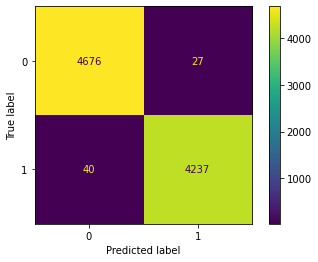

In [94]:
RF_r_score = metrics.confusion_matrix(y_test, RFpred)
print(RF_r_score)
disp = ConfusionMatrixDisplay(RF_r_score)
disp.plot()

In [95]:
RF_r_score = np.flip(RF_r_score)

#accuracy
RF_acc = (RF_r_score[0][0] + RF_r_score[-1][-1]) / np.sum(RF_r_score)
print('accuracy: '+ str(float(RF_acc)))

#precission
RF_precision = sklearn.metrics.precision_score(y_test, RFpred)
print('precision: '+ str(float(RF_precision)))

#recall
RF_recall = sklearn.metrics.recall_score(y_test, RFpred)
print('recall: '+ str(float(RF_recall)))

#f1 score
RF_f1 = sklearn.metrics.f1_score(y_test, RFpred)
print('f1 score: '+ str(float(RF_f1)))

accuracy: 0.9925389755011136
precision: 0.9936679174484052
recall: 0.9906476502221183
f1 score: 0.9921554853061701


In [96]:
RFscore = RF.score(X_test, y_test)
print('Random Forest Classifier')
print('Overall Score: '+ str(float(RFscore)))

Random Forest Classifier
Overall Score: 0.9925389755011136


**Multinomial Naive Bayes**

In [97]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
MNBpred = MNB.predict(X_test)

In [98]:
print(MNBpred)
print(y_test)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


[[4467  236]
 [ 371 3906]]


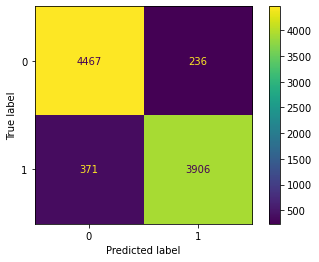

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay

MNB_r_score = metrics.confusion_matrix(y_test, MNBpred)
print(MNB_r_score)
disp = ConfusionMatrixDisplay(MNB_r_score)
disp.plot()

In [100]:
from sklearn.metrics import precision_score

MNB_r_score = np.flip(MNB_r_score)

#accuracy
MNB_acc = (MNB_r_score[0][0] + MNB_r_score[-1][-1]) / np.sum(MNB_r_score)
print('accuracy: '+ str(float(Ada_acc)))

#precission
MNB_precision = sklearn.metrics.precision_score(y_test, MNBpred)
print('precision: '+ str(float(MNB_precision)))

#recall
MNB_recall = sklearn.metrics.recall_score(y_test, MNBpred)
print('recall: '+ str(float(MNB_recall)))

#f1 score
MNB_f1 = sklearn.metrics.f1_score(y_test, MNBpred)
print('f1 score: '+ str(float(MNB_f1)))

accuracy: 0.9957683741648107
precision: 0.9430226943505553
recall: 0.9132569558101473
f1 score: 0.9279011759116286


In [101]:
MNBscore = MNB.score(X_test, y_test)
print('MulinomialNB')
print('Overall Score: '+ str(float(MNBscore)))

MulinomialNB
Overall Score: 0.9324053452115812


**Input Function for manual testing**

In [102]:
def output_lable(n):
    if n == 0:
        return "This news is unreliable."
    elif n == 1:
        return "This news is reliable."
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(stemming) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    
    return print((output_lable(pred_lR[0])))


In [103]:
news = str(input())
manual_testing(news)

NameError: name 'pred_lR' is not defined

In [ ]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaaaaaand', ..., 'zzzzaaaacccchhh', 'zzzzzzzz',
       'zzzzzzzzzzzzz'], dtype=object)